# Demo

## Loading libraries and defining some functions

In [6]:
import glob, serial, time, math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from skimage.transform import iradon
from IPython.display import display
import random

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import StandardScaler

In [7]:
ports = glob.glob('/dev/tty[A-Za-z]*') # Modify if on a platform other than Linux
ports

['/dev/ttyACM2',
 '/dev/ttyUSB2',
 '/dev/ttyUSB1',
 '/dev/ttyUSB0',
 '/dev/ttyprintk',
 '/dev/ttyS31',
 '/dev/ttyS30',
 '/dev/ttyS29',
 '/dev/ttyS28',
 '/dev/ttyS27',
 '/dev/ttyS26',
 '/dev/ttyS25',
 '/dev/ttyS24',
 '/dev/ttyS23',
 '/dev/ttyS22',
 '/dev/ttyS21',
 '/dev/ttyS20',
 '/dev/ttyS19',
 '/dev/ttyS18',
 '/dev/ttyS17',
 '/dev/ttyS16',
 '/dev/ttyS15',
 '/dev/ttyS14',
 '/dev/ttyS13',
 '/dev/ttyS12',
 '/dev/ttyS11',
 '/dev/ttyS10',
 '/dev/ttyS9',
 '/dev/ttyS8',
 '/dev/ttyS7',
 '/dev/ttyS6',
 '/dev/ttyS5',
 '/dev/ttyS4',
 '/dev/ttyS3',
 '/dev/ttyS2',
 '/dev/ttyS1',
 '/dev/ttyS0']

In [8]:
ser = serial.Serial(ports[0], 115200)

In [9]:
ds = {0:b'i',
     7:b'j',
     3:b'k',
     4:b'l',
     2:b'm',
     5:b'n',
     6:b'o',
     1:b'p'}

es = {0:b'a',
     7:b'b',
     1:b'c',
     6:b'd',
     2:b'e',
     4:b'f',
     3:b'g',
     5:b'h'}

def read_d(d):
    ser.write(ds[d])
    while ser.in_waiting < 1:
        pass # wait for a response
    return ser.read_all()

def set_l(l):
    ser.write(es[l])
    while ser.in_waiting < 1:
        pass # wait for a response
    return ser.read_all()

def loff():
    ser.write(b'A')
    while ser.in_waiting < 1:
        pass # wait for a response
    return ser.read_all()

def read_all():
    a = []
    # Take a base set of readings
    loff()
    for d in range(8):
        a.append(int(read_d(d).strip()))
    for l in range(8):
        loff()
        set_l(l)
        for d in range(8):
            a.append(int(read_d(d).strip()))
        loff()
    return a

## Load the training data

In [242]:
# df1 = pd.read_csv('dataset_2q.csv')
# df1 = df1.drop('Unnamed: 0', axis=1)
# df1.head()
df1 = pd.read_csv('demoq.csv')

## Train a model to predict quadrant

In [243]:
X_train, X_test, y_train, y_test = train_test_split(df1[[str(i) for i in range(72)]], df1['q'])

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlpc = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=1000)
mlpc.fit(X_train, y_train)
mlpc.score(X_test, y_test)

0.98

## Take new readings and classify them

In [254]:
in1 = read_all() #df1[[str(i) for i in range(72)]].iloc[200]
X = scaler.transform([in1])
print(mlpc.predict(X))

[4]


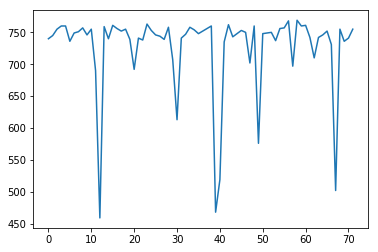

In [86]:
plt.plot(read_all())

## Doing position inference

In [255]:
r8 = pd.read_csv('posinf8_500_readings.csv')
r8.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,X,Y
0,751,713,728,731,738,750,749,751,735,730,...,733,726,709,738,749,750,745,739,1.537372,2.424437
1,730,714,734,741,745,747,748,752,731,725,...,735,720,726,500,742,735,746,754,3.247863,1.492602
2,741,732,743,745,743,737,740,739,741,738,...,748,723,725,730,746,744,740,740,1.990095,3.258206
3,735,723,750,751,745,750,738,756,733,730,...,743,730,716,500,744,735,739,744,2.287863,3.805902
4,724,743,734,725,745,731,743,743,737,732,...,742,731,737,516,751,742,731,738,3.016146,2.346812


0.8128800117846215


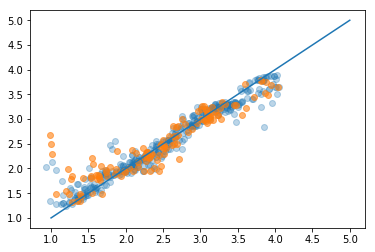

In [256]:
from sklearn.ensemble import RandomForestRegressor # Why not? :)

X_train, X_test, y_train, y_test = train_test_split(r8[[str(i) for i in range(72)]], r8['X'])

regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))
plt.scatter(y_train, regr.predict(X_train), alpha=0.3)
plt.scatter(y_test, regr.predict(X_test).clip(0, 5), alpha=0.6)
plt.plot([1, 2, 3, 4, 5], [1, 2, 3, 4, 5])

Train a new model with both X and Y as outputs and try t on new readings

In [257]:
X_train, X_test, y_train, y_test = train_test_split(r8[[str(i) for i in range(72)]], r8[['X', 'Y']])
r2 = RandomForestRegressor(max_depth=5, random_state=0)
r2.fit(X_train, y_train)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
r3 = MLPRegressor(hidden_layer_sizes=(20, 20, 20))
r3.fit(X_train, y_train)

/home/jonathan/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [259]:
r3.predict(scaler.transform(r8[[str(i) for i in range(72)]].iloc[:3]))

array([[2.18234821, 2.85020491],
       [2.64053319, 2.06353424],
       [1.86283764, 3.07341807]])

In [260]:
X = []
Y = []

In [261]:
from IPython.display import clear_output

while True:
    reading = read_all()
    r = [reading] #scaler.transform([reading])
    p = r2.predict(r)
    X.append(p[0][0])
    Y.append(p[0][1])
    plt.scatter(X, Y)
    plt.scatter([p[0][0]], [p[0][1]])
    plt.show()
    clear_output(wait=True)

KeyboardInterrupt: 

In [234]:
ser.read_all()

b''

In [236]:
X = []
y = []
q = []


In [239]:
for i in range(40):
    readings = read_all()
    X.append(readings)
    y.append(1) # 0 empty, 1 finger, 2 pen
    q.append(2)

In [109]:
d = pd.DataFrame(X)
d['y'] = y
d['q'] = q

In [240]:
d.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,y,q
0,736,747,752,750,753,765,758,757,755,742,...,761,746,735,493,751,745,756,762,0,0
1,758,749,744,747,759,759,763,753,748,741,...,756,748,733,491,745,752,750,755,0,0
2,755,745,744,751,764,762,759,757,749,723,...,740,752,732,507,755,757,741,752,0,0
3,762,761,754,756,754,742,747,748,752,736,...,745,751,732,499,751,758,758,743,0,0
4,753,739,751,742,755,751,746,754,750,733,...,762,739,727,497,744,742,744,749,0,0


In [241]:
d.to_csv('demoq.csv', index=False)